In [1]:
#Various import 
import random
from copy import copy
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


In [2]:

class Agent:
    def __init__(self, data, size, id):
        self.data = data
        self.size = size
        self.id = id

    def __str__(self):
        return "Agent " + str(self.id) + ", " + str(self.data) + " | Score : " + str(self.score()) +"\n"

    def __repr__(self):
        return self.__str__()

    def __gt__(self, other):
        return (self.score() > other.score())

    def score(self):
        return 1 - ((self.size - self.data.count('1')) / self.size)

    def flip_bit(self, bit_to_flip):
        self.data[bit_to_flip] = not self.data[bit_to_flip]

    def mutation_bit_flip_1_n(self):
        bit_to_flip = random.random.randrange(0, self.size)
        flip_bit(bit_to_flip)



In [3]:
class Population:
    def __init__(self, size):
        self.size = size
        self.agents = []
        for x in range(size):
            l = [random.randrange(0, 2) for y in range(size)]
            self.agents.append(Agent("".join(str(x) for x in l), size, x))
        self.sort()

    def sort(self):
        self.agents.sort(reverse=True)

    def __str__(self):
        string_to_return = ""
        for agent in  self.agents:
            string_to_return += (agent.__str__())
        return string_to_return

    def __repr__(self):
        return self.__str__()

    def select_best_agents(self,number_of_agent_to_return):
        return self.agents[:number_of_agent_to_return]

    def select_random_agents(self,number_of_agent_to_return):
        return "@TODO"

    def select_tournament_agents(self,number_of_agent_to_return):
        return "@TODO"

    def croisement(self, agent1, agent2):
        #@TODO : ADD ONE POINT TO SLICE
        agent1Temporaire = copy(agent1)
        agent2Temporaire = copy(agent2)

        agent1.data = agent1.data[:int((agent1.size)/2)] #Cut the string at the half
        agent1.data +=  (agent2.data[int((agent2.size)/2):]) #Append the end of the second one

        agent2.data = agent2Temporaire.data[:int((agent2Temporaire.size)/2)]
        agent2.data +=  (agent1Temporaire.data[int((agent1Temporaire.size)/2):])



    def add(self,agents):
        for agent in agents:
            self.agents.insert(0,agent)

string to get: 11111111
Population initiale
Agent 1, 11111010 | Score : 0.75
Agent 7, 10101111 | Score : 0.75
Agent 0, 10110011 | Score : 0.625
Agent 4, 01110101 | Score : 0.625
Agent 3, 10100100 | Score : 0.375
Agent 5, 00010010 | Score : 0.25
Agent 6, 10000100 | Score : 0.25
Agent 2, 00000010 | Score : 0.125

Generation:  1
Agent 1, 11111111 | Score : 1.0



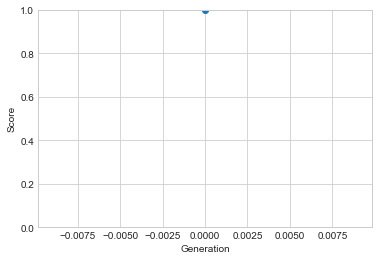

In [4]:
def init_string_to_get(size):
    return "1"*size

def mutate(population, number_of_agent):
    new_population  = Population(number_of_agent)
    new_population.add(population.select_best_agents(number_of_agent))
    return new_population

size = 8
number_of_agent_to_select=2

string_to_get = init_string_to_get(size)
print("string to get: " + string_to_get)

population = Population(size)
print("Population initiale")
print(population)

#print(population.select_best_agents(2))
generation=0


while population.select_best_agents(1)[0].score() != 1.0:
    population.croisement(population.select_best_agents(2)[0], population.select_best_agents(2)[1])
    if  population.select_best_agents(1)[0].score() <= 0.75 :
        population = mutate(population, size-number_of_agent_to_select)
    population.sort()
    #print("Generation: ", str(generation))
    #print(population.select_best_agents(1)[0])
    plt.scatter(generation,population.select_best_agents(1)[0].score())
    generation += 1
    
print("Generation: ", str(generation))
print(population.select_best_agents(1)[0])

plt.ylim([0,1])
plt.ylabel('Score')
plt.xlabel('Generation')
plt.show()